In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as ts
import keras

Using TensorFlow backend.


In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# 欣賞數據及內容

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


this is a Ankle boot


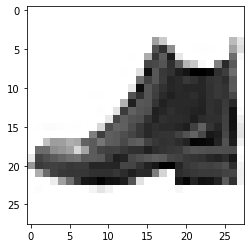

In [7]:
n = 2356
print('this is a', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [9]:
len(x_test)

10000

In [10]:
len(x_test)

10000

In [11]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train= to_categorical(y_train, 10)

In [16]:
y_test= to_categorical(y_train, 10)

##建置模型

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()
model.add(Dense(99, input_dim=784, activation='relu'))
model.add(Dense(99, activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(loss='mse', optimizer=SGD(lr=0.085), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 99)                77715     
_________________________________________________________________
dense_1 (Dense)              (None, 99)                9900      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1000      
Total params: 88,615
Trainable params: 88,615
Non-trainable params: 0
_________________________________________________________________


## 訓練

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0687 - acc: 0.5451
Epoch 2/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0426 - acc: 0.7082
Epoch 3/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0350 - acc: 0.7718
Epoch 4/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0311 - acc: 0.7998
Epoch 5/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0288 - acc: 0.8127
Epoch 6/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0272 - acc: 0.8209
Epoch 7/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0262 - acc: 0.8261
Epoch 8/20
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0253 - acc: 0.8314
Epoch 9/20
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0246 - acc: 0.8355
Epoch 10/20
60000/60000 [==============================] - 

In [24]:
result = model.predict_classes(x_test)

In [25]:
result[256]

8

神經網路預測是: Bag


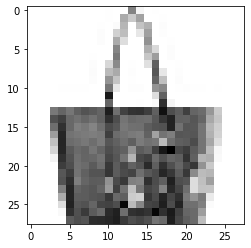

In [26]:
n = 256
print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

### 減少神經元

In [27]:
model2 = Sequential()
model2.add(Dense(10, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='relu'))

In [28]:
model2.add(Dense(10, activation="softmax"))

In [29]:
model2.compile(loss='mse' , optimizer=SGD(lr=0.085) , metrics=['accuracy'])

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0233 - acc: 0.8417
Epoch 2/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0232 - acc: 0.8424
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0231 - acc: 0.8432
Epoch 4/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0229 - acc: 0.8439
Epoch 5/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0229 - acc: 0.8447
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0228 - acc: 0.8448
Epoch 7/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0226 - acc: 0.8466
Epoch 8/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0225 - acc: 0.8471
Epoch 9/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0225 - acc: 0.8476
Epoch 10/20
60000/60000 [==============================] - 

In [34]:
result2 = model2.predict_classes(x_test)

神經網路預測是: Trouser


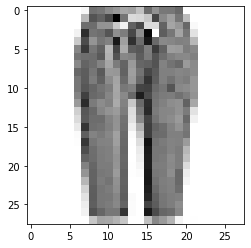

In [35]:
n = 849
print('神經網路預測是:',class_names[result2[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')

比較神經元10個跟99個的差距，99個的accuracy是0.8593，而10個的是0.8531差距很小，且如果都提高訓練次數可能會有差不多的結果，所以如何是足夠且能有效率預測的神經元數量，是值得去討論的。